# Table of Contents
 <p>

In [28]:
from IPython.display import display, Image, IFrame, Math, Latex

In [29]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [30]:
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [31]:
# IFrame('hw01.pdf', width=600, height=400)

# Question 1 : Univariate Regression

Train a univariate linear regression model to predict house prices as a function 
of their floor size, based on the solution to the system with 2 linear equations 
discussed in class. Use the dataset from the folder hw01/data/univariate. 
Python3 skeleton code is provided in univariate.py. 
After training print the parameters and report the RMSE and the objective 
function values on the training and test data. Plot the training using the 
default blue circles and test examples using lime green triangles. 
On the same graph also plot the linear approximation.

In [35]:
!ls

boxBalls            data                hw01.ipynb          simple_lin_reg(SLR)
code                dwn                 hw01.pdf


In [36]:
!ls code

multivariate.py      train-test-line.png  univariate_orig.py
multivariate_orig.py univariate.py


In [42]:
# %load './code/univariate.py'
#!python
###########################################################################
# Author      : Bhishan Poudel; Physics Graduate Student, Ohio University
# Date        : Sep 12, 2017 Tue
# Last update :
###########################################################################
"""
:Topic: Homework 1 Qn 2.1 Univariate Regression

:Runtime:

.. note::

   np.polynomial.polynomial.polyfit returns coefficients [A, B, C] to A + Bx + Cx^2 + ...
   coeffs = np.polynomial.polynomial.polyfit(x, y, 4)
   print(coeffs)


   # np.polyfit returns: ... + Ax^2 + Bx + C
   coeffs = np.polyfit(x, y, 4)
   print(coeffs)

""";
# Imports
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly

'\n:Topic: Homework 1 Qn 2.1 Univariate Regression\n\n:Runtime:\n\n.. note::\n\n   np.polynomial.polynomial.polyfit returns coefficients [A, B, C] to A + Bx + Cx^2 + ...\n   coeffs = np.polynomial.polynomial.polyfit(x, y, 4)\n   print(coeffs)\n\n\n   # np.polyfit returns: ... + Ax^2 + Bx + C\n   coeffs = np.polyfit(x, y, 4)\n   print(coeffs)\n\n'

In [55]:
def read_data(infile):
    data = np.genfromtxt(infile, delimiter=' ',dtype=int)
    X = data[:,0].reshape(len(data),1)
    t = data[:,-1].reshape(len(data),1)
#     print("X.shape = ", X.shape)
#     print("t.shape = ", t.shape)
    return [X, t]

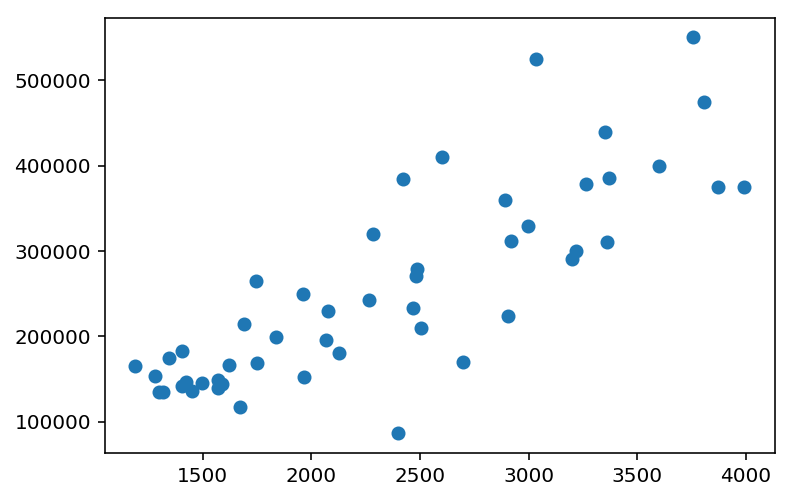

In [69]:
# Run read_data
# !ls data/univariate
X,t = read_data('data/univariate/train_orig.txt')
# X.shape, t.shape
plt.scatter(X,t)

In [57]:
def train(X, t):
    """Implement univariate linear regression to compute w = [w0, w1]."""

    # method 1 np.polyfit
    w0,w1 = poly.polyfit(X[0,:], t[0,:],deg=1)
    print('w0 from numpy polynomial polynomial polyfit = {:.5e}'.format(w0))
    print('w1 from numpy polynomial polynomial polyfit = {:.5e}'.format(w1))

    # method 2 np poly poly polyfit
    # X = X - np.mean(X)
    # t = t - np.mean(t)
#     w0,w1 = poly.polyfit(X[0,:], t[0,:],deg=1)
#     print('w0 from numpy polynomial polynomial polyfit = {:.5e}'.format(w0))
#     print('w1 from numpy polynomial polynomial polyfit = {:.5e}'.format(w1))

    # method 3
    # covar = np.cov(X, t, bias=True)[0][1]
    # covar = np.cov(X, t, ddof=0)[0][1]
    # var = np.var(X)
    # w1 = covar/var
    # w0 = np.mean(t) - w1 * np.mean(X)
    # # print(np.cov(X, t, ddof=0))
    # print('w0 from numpy cov = {:.5e}'.format(w0))
    # print('w1 from numpy cov = {:.5e}'.format(w1))

    w = np.array([w0, w1])
    print("w = ", w)
    return w

w0 from numpy polynomial polynomial polyfit = 2.62500e+05
w1 from numpy polynomial polynomial polyfit = 8.65765e+01
w =  [  2.62500000e+05   8.65765172e+01]


/Users/poudel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RankWarning: The fit may be poorly conditioned
  import sys


(50, 1)

Params:  [  2.62500000e+05   8.65765172e+01]


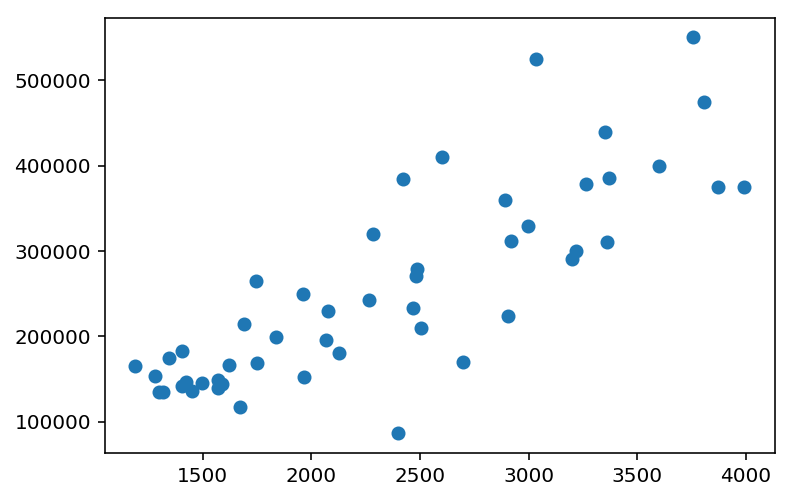

In [70]:
# Get weights
Xtrain, ttrain = read_data("data/univariate/train_orig.txt")
w = train(Xtrain, ttrain)

Xtrain.shape
# Print model parameters.
print('Params: ', w)
plt.scatter(Xtrain, ttrain)

In [65]:
def compute_rmse(X,t,w):
    """Compute RMSE on dataset (X, t)."""
    X = np.append(np.ones([len(t),1]),X,axis=-1)
    print("X = ", X)
    print("X.shape = ", X.shape)
    print("t = ", t)
    print("t.shape = ", t.shape)
    print("w = ", w)
    print("w.shape = ", w.shape)
    # rmse = np.sqrt(((tpred - t) ** 2).mean())
    rmse = 0

    return rmse

In [ ]:
# Run RMSE
X

In [ ]:
def compute_cost(X, t, w):
    """Compute objective function on dataset (X, t)."""

    m = len(t)  # number of tranning examples
    J = 0
    J = 1/(2*m) * ((X*w) - t).T * ((X*w) - t)
    return J

In [ ]:
def myplot(data1,data2,data3):
    # matplotlib customization
    plt.style.use('ggplot')
    fig, ax = plt.subplots()

    # data
    X1,X2,X3 = data1[:,0], data2[:,0],data3[:,0]
    t1,t2,t3 = data1[:,-1]/1000, data2[:,-1]/1000, data3[:,-1]/1000

    # plot with label, title
    ax.plot(X1,t1,'bo',label='Train')
    ax.plot(X2,t2,'g^',label='Test')

    # set xlabel and ylabel to AxisObject
    ax.set_xlabel('Floor Size (Square Feet)')
    ax.set_ylabel('House Price (Thousands Dollar)')
    ax.set_title('HW 1 Qn2.1 Univariate Regression')
    ax.legend()
    ax.grid(True)
    plt.savefig('train-test-line.png')
    # plt.show()

In [ ]:
##=======================================================================
## Main Program
##=======================================================================
def main():
    """Run main function."""
    parser = argparse.ArgumentParser('Univariate Exercise.')
    parser.add_argument('-i', '--input_data_dir',
                        type=str,
                        default='../data/univariate',
                        help='Directory for the univariate houses dataset.')
    FLAGS, unparsed = parser.parse_known_args()

    # Read the training and test data.
    Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/train.txt")
    Xtest, ttest = read_data(FLAGS.input_data_dir + "/test.txt")

    # print("Xtrain = ", Xtrain) # ndarray


    # Train model on training examples.
    # w = train(Xtrain, ttrain)

    # Print model parameters.
    # print('Params: ', w)

    # # Print cost and RMSE on training data.
    # print('Training RMSE: %0.2f.' % compute_rmse(Xtrain, ttrain, w))
    # print('Training cost: %0.2f.' % compute_cost(Xtrain, ttrain, w))
    #
    # # Print cost and RMSE on test data.
    # print('Test RMSE: %0.2f.' % compute_rmse(Xtest, ttest, w))
    # print('Test cost: %0.2f.' % compute_cost(Xtest, ttest, w))

    #  YOUR CODE here: plot the training and test examples with different symbols,
    #                  plot the linear approximation on the same graph.
    #
    #
    w = train(Xtrain, ttrain)
    # print('Params: ', w)
    compute_rmse(Xtrain, ttrain, w)

In [40]:
if __name__ == "__main__":
    import time

    # Beginning time
    program_begin_time = time.time()
    begin_ctime        = time.ctime()

    #  Run the main program
    main()


    # Print the time taken
    program_end_time = time.time()
    end_ctime        = time.ctime()
    seconds          = program_end_time - program_begin_time
    m, s             = divmod(seconds, 60)
    h, m             = divmod(m, 60)
    d, h             = divmod(h, 24)
    print("\nBegin time: ", begin_ctime)
    print("End   time: ", end_ctime, "\n")
    print("Time taken: {0: .0f} days, {1: .0f} hours, \
      {2: .0f} minutes, {3: f} seconds.".format(d, h, m, s))

'\n:Topic: Homework 1 Qn 2.1 Univariate Regression\n\n:Runtime:\n\n.. note::\n\n   np.polynomial.polynomial.polyfit returns coefficients [A, B, C] to A + Bx + Cx^2 + ...\n   coeffs = np.polynomial.polynomial.polyfit(x, y, 4)\n   print(coeffs)\n\n\n   # np.polyfit returns: ... + Ax^2 + Bx + C\n   coeffs = np.polyfit(x, y, 4)\n   print(coeffs)\n\n'

FileNotFoundError: [Errno 2] No such file or directory: '../data/univariate/train.txt'